C:\Users\Netgi\AppData\Local\Temp\ipykernel_14012\2324143771.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_categoria.values, y=vendas_categoria.index, palette="viridis")


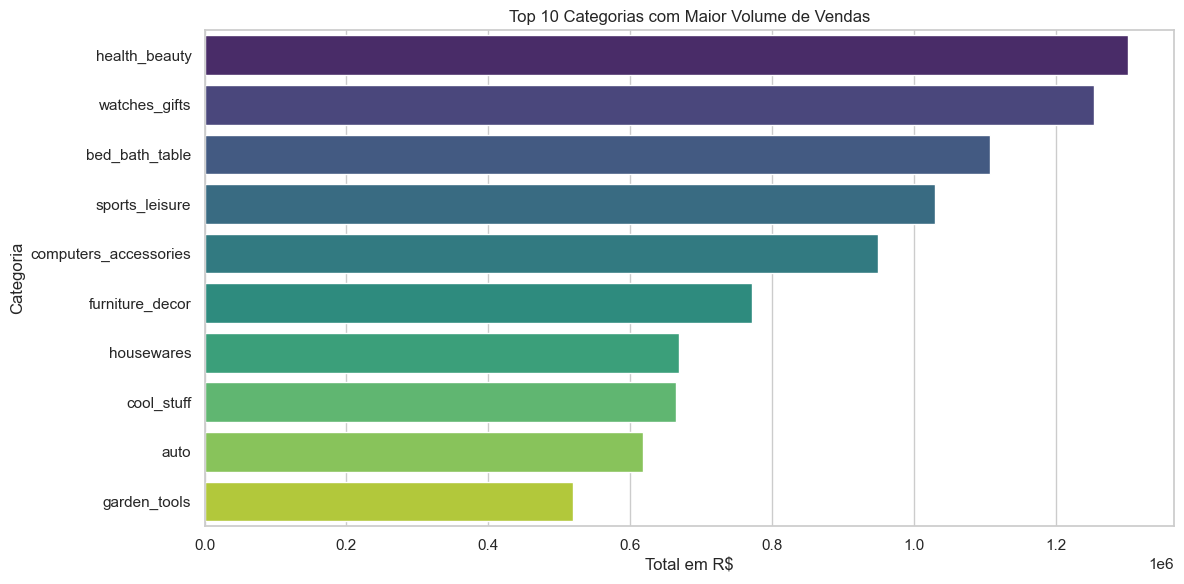

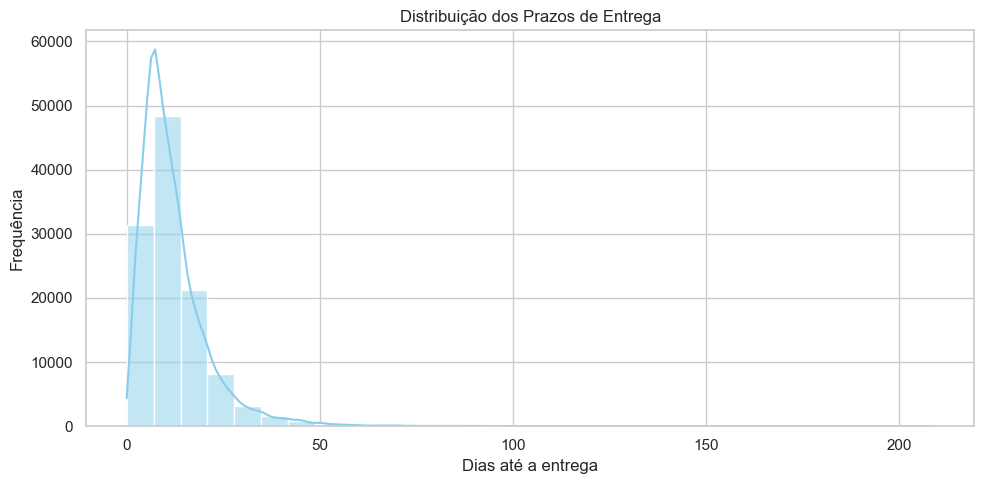

Prazo médio de entrega: 12.02 dias


C:\Users\Netgi\AppData\Local\Temp\ipykernel_14012\2324143771.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_avaliacoes, x='was_late', y='review_score', palette='coolwarm')


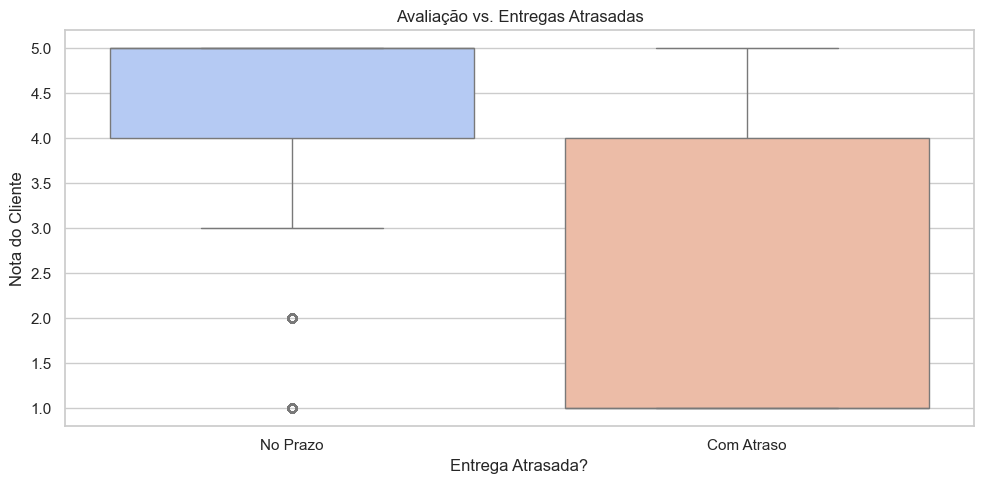

C:\Users\Netgi\AppData\Local\Temp\ipykernel_14012\2324143771.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_categoria.values, y=lucro_categoria.index, palette="crest")


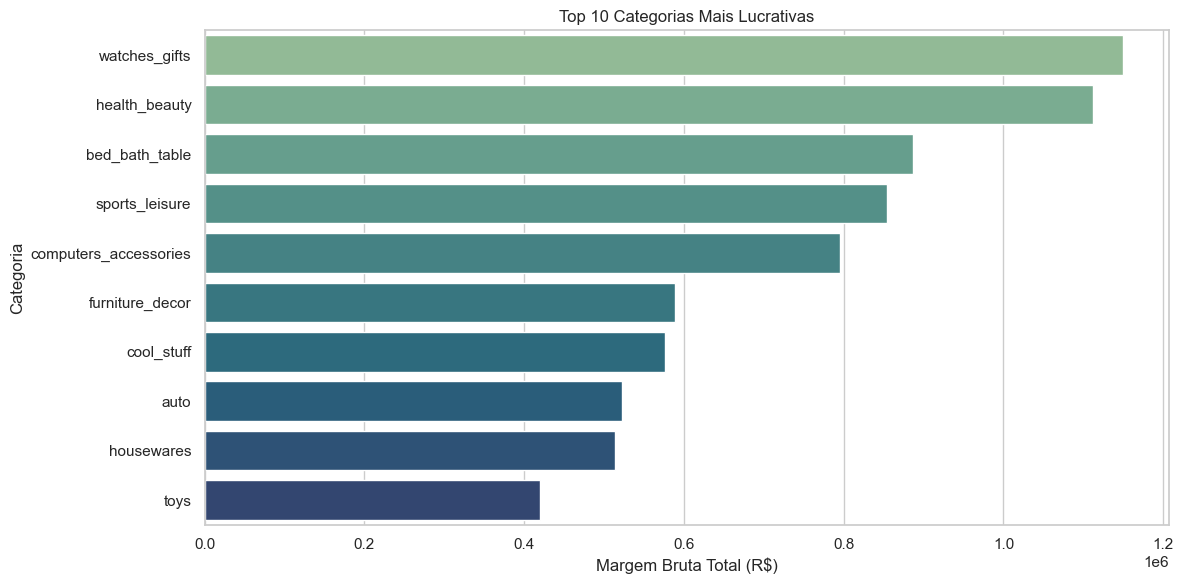

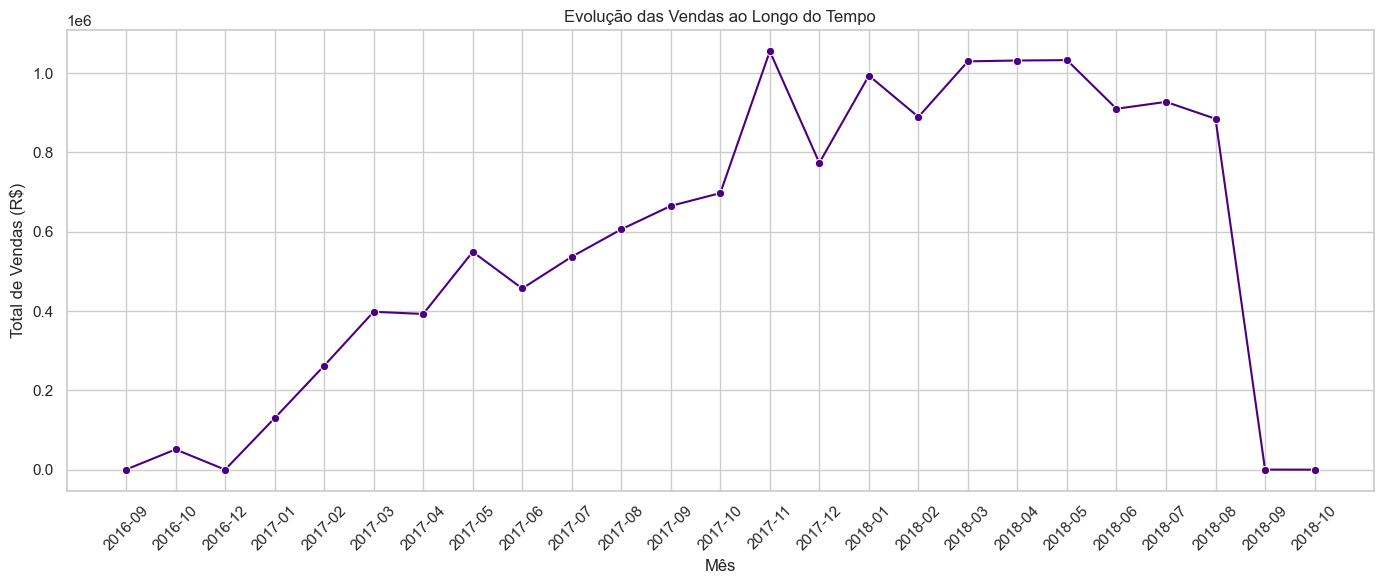

In [1]:
# 📦 Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Carregando os dados processados
df = pd.read_csv('../processed/ecommerce_data_processed.csv')

# 📌 Ajuste de data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Tema dos gráficos
sns.set(style="whitegrid")

# ---------------------------
# 🔍 1. Performance de Vendas
# ---------------------------
vendas_categoria = df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_categoria.values, y=vendas_categoria.index, palette="viridis")
plt.title('Top 10 Categorias com Maior Volume de Vendas')
plt.xlabel('Total em R$')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# ---------------------------
# 🚚 2. Prazos de Entrega
# ---------------------------
prazo_entrega = df['delivery_time_days'].dropna()

plt.figure(figsize=(10,5))
sns.histplot(prazo_entrega, bins=30, kde=True, color="skyblue")
plt.title('Distribuição dos Prazos de Entrega')
plt.xlabel('Dias até a entrega')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

media_prazo = prazo_entrega.mean()
print(f"Prazo médio de entrega: {media_prazo:.2f} dias")

# ---------------------------
# ⭐ 3. Impacto dos Atrasos na Avaliação
# ---------------------------
df_avaliacoes = df[df['review_score'].notnull()]
df_avaliacoes.loc[:, 'review_score'] = df_avaliacoes['review_score'].astype(int)

plt.figure(figsize=(10,5))
sns.boxplot(data=df_avaliacoes, x='was_late', y='review_score', palette='coolwarm')
plt.xticks([0, 1], ['No Prazo', 'Com Atraso'])
plt.title('Avaliação vs. Entregas Atrasadas')
plt.ylabel('Nota do Cliente')
plt.xlabel('Entrega Atrasada?')
plt.tight_layout()
plt.show()

# ---------------------------
# 💰 4. Lucratividade por Categoria
# ---------------------------
lucro_categoria = df.groupby('product_category_name_english')['gross_margin'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=lucro_categoria.values, y=lucro_categoria.index, palette="crest")
plt.title('Top 10 Categorias Mais Lucrativas')
plt.xlabel('Margem Bruta Total (R$)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# ---------------------------
# 📈 5. Eficácia de Promoções (Estimativa Temporal)
# ---------------------------
df['mes'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
vendas_mensais = df.groupby('mes')['price'].sum()

plt.figure(figsize=(14,6))
sns.lineplot(x=vendas_mensais.index, y=vendas_mensais.values, marker='o', color='indigo')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
